# Работа с данными в Python

Данные обычно хранятся в виде **таблиц** (MS Excel, базы данных SQL, Hadoop MapReduce и т.д.)

Примеры операций с данными:
1. чтение и запись
2. просмотр (столбцы, строки, названия) и индексация
3. статистика, агрегатные функции
4. расчет новых значений
5. добавление/изменение/удаление строк и столбцов
6. поиск и фильтрация
7. сортировка
8. визуализация
9. переименование строк/столбцов
10. объединение нескольких таблиц
11. группировка значений и агрегация

## Формат CSV

**C**omma **S**eparated **V**alues – "значения, разделенные запятыми" (или другим разделителем).

В качестве примера рассмотрим набор данных с подробным описанием жилых домов в штате Айова, США (источник: соревнование [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на платформе [Kaggle](https://www.kaggle.com)).

In [203]:
with open('src/train.csv', 'r') as datafile:
    data_lines = datafile.read().splitlines()

In [205]:
print(data_lines[1])

1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500


In [4]:
print(data_lines[1])

1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500


## Библиотека Pandas

[Pandas](http://pandas.pydata.org) не является частью языка Python. В Anaconda уже установлена, а в обычном Python нужно установить:

In [206]:
!pip install pandas

In [207]:
import pandas as pd

In [208]:
pd.d

SyntaxError: invalid syntax (<ipython-input-208-bc888235687a>, line 1)

In [209]:
print(pd.__version__)

0.25.1


Важные "сущности":
- `pd.DataFrame` – таблица (двумерные данные)
- `pd.Series` – столбец/строка (одномерные данные)
- `pd.Index` – индекс (список названий строк/столбцов)

## Чтение/запись таблицы из файла CSV

Важные параметры:
- `sep=','` – разделитель (бывает `'\t'`, `';'`, `' '` и т.д.)
- `decimal='.'` – символ, отделяющий дробную часть (в русской локали бывает `','`)
- `encoding='utf8'` – кодировка (в Windows часто бывает `'cp1251'`)

In [372]:
df = pd.read_csv('src/train.csv')

In [373]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [213]:
df.to_csv('src/train_head.csv')

## Просмотр таблицы и индексация

In [322]:
df = pd.read_csv('src/train.csv', nrows=100, index_col='Id')

### Часть таблицы

In [215]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                       ...                                          
1         Norm     1Fam  ...          0           61              0   
2         Norm     1Fam  ...        298            0              0   
3         Norm     1Fam  ...          0           42              0   
4         Norm     1Fam  ...          0           35            272   
5         Norm     1Fam  ...        192           84              0   
..         ...      ...  ...        ...          ...            ...   
96        Norm     1Fam  ...        232           63              0   
97        Norm     1Fam  ...        158           29              0   
98        Norm     1Fam  ...        120            0              0   
99        Norm     1Fam  ...          0            0             77   
100       Norm     1Fam  ...        352            0              0   

     3SsnPorch  ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
Id                                                                              
1            0            0        0    NaN   NaN         NaN       0       2   
2            0            0        0    NaN   NaN         NaN       0       5   
3            0            0        0    NaN   NaN         NaN       0       9   
4            0            0        0    NaN   NaN         NaN       0       2   
5            0            0        0    NaN   NaN         NaN       0      12   
..         ...          ...      ...    ...   ...         ...     ...     ...   
96           0            0        0    NaN   NaN        Shed     480       4   
97           0            0        0    NaN   NaN         NaN       0       8   
98           0            0        0    NaN   NaN         NaN       0       5   
99           0            0        0    NaN   NaN        Shed     400       5   
100          0            0        0    NaN   NaN        Shed     400       1   

    YrSold SaleType SaleCondition SalePrice  
Id                                           
1     2008       WD        Normal    208500  
2 

In [221]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)

In [216]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                      ...                                                     
1        Norm     1Fam  ...          0           61              0          0   
2        Norm     1Fam  ...        298            0              0          0   
3        Norm     1Fam  ...          0           42              0          0   
4        Norm     1Fam  ...          0           35            272          0   
5        Norm     1Fam  ...        192           84              0          0   

    ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  MoSold YrSold  \
Id                                                                         
1             0        0    NaN   NaN         NaN       0       2   2008   
2             0        0    NaN   NaN         NaN       0       5   2007   
3             0        0    NaN   NaN         NaN       0       9   2008   
4             0        0    NaN   NaN         NaN       0       2   2006   
5             0        0    NaN   NaN         NaN       0      12   2008   

   SaleType SaleCondition SalePrice  
Id                                   
1        WD        Normal    208500  
2        WD        Normal    181500  
3        WD        Normal    223500  
4        WD       Abnorml    140000  
5        WD        Normal    250000  

[5 rows x 80 columns]

In [218]:
df.tail(15)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
86           60       RL        121.0    16059   Pave   NaN      Reg   
87           60       RL        122.0    11911   Pave   NaN      IR2   
88          160       FV         40.0     3951   Pave  Pave      Reg   
89           50  C (all)        105.0     8470   Pave   NaN      IR1   
90           20       RL         60.0     8070   Pave   NaN      Reg   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
86          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
87          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
88          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
89          Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
90          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                       ...                                          
86        Norm     1Fam  ...        127           82              0   
87        Norm     1Fam  ...        100           38              0   
88        Norm   TwnhsE  ...          0          234              0   
89       Feedr     1Fam  ...          0            0            156   
90        Norm     1Fam  ...          0            0              0   
..         ...      ...  ...        ...          ...            ...   
96        Norm     1Fam  ...        232           63              0   
97        Norm     1Fam  ...        158           29              0   
98        Norm     1Fam  ...        120            0              0   
99        Norm     1Fam  ...          0            0             77   
100       Norm     1Fam  ...        352            0              0   

     3SsnPorch  ScreenPorch PoolArea PoolQC  Fence MiscFeature MiscVal  \
Id                                                                       
86           0            0        0    NaN    NaN         NaN       0   
87           0            0        0    NaN    NaN         NaN       0   
88           0            0        0    NaN    NaN         NaN       0   
89           0            0        0    NaN  MnPrv         NaN       0   
90           0            0        0    NaN    NaN         NaN       0   
..         ...          ...      ...    ...    ...         ...     ...   
96           0            0        0    NaN    NaN        Shed     480   
97           0            0        0    NaN    NaN         NaN       0   
98           0            0        0    NaN    NaN         NaN       0   
99           0            0        0    NaN    NaN        Shed     400   
100          0            0        0    NaN    NaN        Shed     400   

     MoSold YrSold SaleType SaleCondition SalePrice  
Id                                                   
86        4   2006       WD        Normal    260000  
87        3   2009       WD        Normal    174000  
88        6   2

In [222]:
df.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
19          20       RL         66.0    13695   Pave   NaN      Reg   
15          20       RL          NaN    10920   Pave   NaN      IR1   
53          90       RM        110.0     8472   Grvl   NaN      IR2   
51          60       RL          NaN    13869   Pave   NaN      IR2   
23          20       RL         75.0     9742   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
19         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
15         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
53         Bnk    AllPub    Corner       Mod       IDOTRR       RRNn   
51         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
23         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
19       Norm     1Fam     1Story            5            5       2004   
15       Norm     1Fam     1Story            6            5       1960   
53       Norm   Duplex     1Story            5            5       1963   
51       Norm     1Fam     2Story            6            6       1997   
23       Norm     1Fam     1Story            8            5       2002   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
19          2004     Gable  CompShg     VinylSd     VinylSd       None   
15          1960       Hip  CompShg     MetalSd     MetalSd    BrkFace   
53          1963     Gable  CompShg     Wd Sdng     Wd Sdng       None   
51          1997     Gable  CompShg     VinylSd     VinylSd       None   
23          2002       Hip  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
19           0        TA        TA      PConc       TA       TA           No   
15         212        TA        TA     CBlock       TA       TA           No   
53           0        Fa        TA     CBlock       Gd       TA           Gd   
51           0        TA        TA      PConc       Gd       TA           Av   
23         281        Gd        TA      PConc       Gd       TA           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
19          GLQ         646          Unf           0        468         1114   
15          BLQ         733          Unf           0        520         1253   
53          LwQ         104          GLQ         712          0          816   
51          GLQ         182          Unf           0        612          794   
23          Unf           0          Unf           0       1777         1777   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
19    GasA        Ex          Y      SBrkr      1114         0             0   
15    GasA        TA          Y      SBrkr      1253         0             0   
53    GasA        TA          N      SBrkr       816         0             0   
51    GasA        Gd          Y      SBrkr       794       676             0   
23    GasA        Ex          Y      SBrkr      1795         0             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
19       1114             1             0         1         1             3   
15       1253             1             0  

### Индекс и названия столбцов

In [223]:
df.shape

(100, 80)

In [224]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='Id')

In [225]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [34]:
df.sample(5).index

Int64Index([81, 48, 3, 6, 9], dtype='int64', name='Id')

In [226]:
df.T

Id                 1        2        3        4        5        6        7    \
MSSubClass          60       20       60       70       60       50       20   
MSZoning            RL       RL       RL       RL       RL       RL       RL   
LotFrontage         65       80       68       60       84       85       75   
LotArea           8450     9600    11250     9550    14260    14115    10084   
Street            Pave     Pave     Pave     Pave     Pave     Pave     Pave   
Alley              NaN      NaN      NaN      NaN      NaN      NaN      NaN   
LotShape           Reg      Reg      IR1      IR1      IR1      IR1      Reg   
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl      Lvl      Lvl   
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   
LotConfig       Inside      FR2   Inside   Corner      FR2   Inside   Inside   
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl      Gtl      Gtl   
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge  Mitchel  Somerst   
Condition1        Norm    Feedr     Norm     Norm     Norm     Norm     Norm   
Condition2        Norm     Norm     Norm     Norm     Norm     Norm     Norm   
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam     1Fam     1Fam   
HouseStyle      2Story   1Story   2Story   2Story   2Story   1.5Fin   1Story   
OverallQual          7        6        7        7        8        5        8   
OverallCond          5        8        5        5        5        5        5   
YearBuilt         2003     1976     2001     1915     2000     1993     2004   
YearRemodAdd      2003     1976     2002     1970     2000     1995     2005   
RoofStyle        Gable    Gable    Gable    Gable    Gable    Gable    Gable   
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg  CompShg  CompShg   
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd  VinylSd  VinylSd   
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd  VinylSd  VinylSd   
MasVnrType     BrkFace     None  BrkFace     None  BrkFace     None    Stone   
MasVnrArea         196        0      162        0      350        0      186   
ExterQual           Gd       TA       Gd       TA       Gd       TA       Gd   
ExterCond           TA       TA       TA       TA       TA       TA       TA   
Foundation       PConc   CBlock    PConc   BrkTil    PConc     Wood    PConc   
BsmtQual            Gd       Gd       Gd       TA       Gd       Gd       Ex   
BsmtCond            TA       TA       TA       Gd       TA       TA       TA   
BsmtExposure        No       Gd       Mn       No       Av       No       Av   
BsmtFinType1       GLQ      ALQ      GLQ      ALQ      GLQ      GLQ      GLQ   
BsmtFinSF1         706      978      486      216      655      732     1369   
BsmtFinType2       Unf      Unf      Unf      Unf      Unf      Unf      Unf   
BsmtFinSF2           0        0        0        0        0        0        0   
BsmtUnfSF          150      284      434      540      490       64      317   
TotalBsmtSF        856     1262      920      756     1145      796     1686   
Heating           GasA     GasA     GasA     GasA     GasA     GasA     GasA   
HeatingQC           Ex       Ex       Ex       Gd       Ex       Ex       Ex   
CentralAir           Y        Y        Y        Y        Y        Y        Y   
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr    SBrkr    SBrkr   
1stFlrSF           856     1262      920      961     1145      796     1694   
2ndFlrSF           854        0      866      756     1053      566        0   
LowQualFinSF         0        0        0        0        0        0        0   
GrLivArea         1710     1262     1786     1717     2198     1362     1694   
BsmtFullBath         1        0        1        1        1        1        1   
BsmtHalfBath         0        1        0        0        0        0        0   
FullBath             2        2        2        1        2        1        2   


In [227]:
print(df.T.shape)
print(df.T.columns)

(80, 100)
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='Id')


### Базовая индексация

[Официальная документация](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

#### Столбцы

In [230]:
type(df['LotFrontage'])

pandas.core.series.Series

In [39]:
type(df['SalePrice'])

pandas.core.series.Series

In [40]:
df['SalePrice'].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
             27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
             40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
             53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
             66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
             79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64', name='Id')

In [231]:
df['SalePrice'].columns

AttributeError: 'Series' object has no attribute 'columns'

In [232]:
df[['SaleType']]

SaleType
Id          
1         WD
2         WD
3         WD
4         WD
5         WD
6         WD
7         WD
8         WD
9         WD
10        WD
11        WD
12       New
13        WD
14       New
15        WD
16        WD
17        WD
18        WD
19        WD
20       COD
21       New
22        WD
23        WD
24        WD
25        WD
26        WD
27        WD
28        WD
29        WD
30        WD
31        WD
32        WD
33        WD
34        WD
35        WD
36        WD
37        WD
38        WD
39        WD
40        WD
41        WD
42        WD
43        WD
44        WD
45        WD
46        WD
47        WD
48        WD
49       New
50        WD
51        WD
52        WD
53        WD
54        WD
55        WD
56        WD
57        WD
58        WD
59       New
60        WD
61       New
62        WD
63        WD
64        WD
65        WD
66        WD
67        WD
68        WD
69        WD
70        WD
71        WD
72        WD
73        WD
74        WD
75        WD
76        WD
77        WD
78        WD
79        WD
80        WD
81        WD
82        WD
83        WD
84       COD
85        WD
86        WD
87        WD
88       New
89     ConLD
90        WD
91        WD
92        WD
93        WD
94        WD
95        WD
96        WD
97        WD
98        WD
99       COD
100       WD

Вопрос: чем отличается `df['SalePrice']` от `df[['SalePrice']]`?

#### Строки

In [233]:
df.loc[1]

MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea             8450
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2003
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           196
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         GLQ
BsmtFinSF1           706
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            150
TotalBsmtSF          856
Heating             GasA
HeatingQC             Ex


In [234]:
type(df.loc[1])

pandas.core.series.Series

In [235]:
df.loc[1].index

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [49]:
df.loc[1].columns

AttributeError: 'Series' object has no attribute 'columns'

In [236]:
df.loc[[1, 3, 4]]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1          196        Gd        TA      PConc       Gd       TA           No   
3          162        Gd        TA      PConc       Gd       TA           Mn   
4            0        TA        TA     BrkTil       TA       Gd           No   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
3        1786             1             0         2         1             3   
4        1717             1             0         1         0             3   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
Id                                                                              
1              1          Gd             8        Typ           0         NaN   
3              1          Gd             6        Typ           1          TA   
4              1          Gd             7        Typ           1          Gd   

   GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
Id                                                                           
1      Attchd       2003.0          RFn           2         548         TA   
3      Attchd       2001.0          RFn           2         608         TA   
4      Detchd       1998.0          Unf           3         642         TA   

   GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                                                                    

#### Столбцы и строки

Если оба индекса – значения, то получаем один объект:

In [237]:
df.loc[3, 'YrSold']

2008

Если один из индексов – список значений, то получаем `Series`:

In [238]:
df.loc[[1, 3, 4], 'SalePrice']

Id
1    208500
3    223500
4    140000
Name: SalePrice, dtype: int64

Если оба индекса – списки значений, то получаем `DataFrame`:

In [240]:
df.loc[[1, 3, 4], ['SalePrice', 'YrSold']]

SalePrice  YrSold
Id                   
1      208500    2008
3      223500    2008
4      140000    2006

In [241]:
arr = [1, 2, 3, 4]

In [249]:
arr[::2]

[1, 3]

Вместо списков могут быть срезы (`slice`):

In [250]:
df.loc[1:3, 'YrSold']

Id
1    2008
2    2007
3    2008
Name: YrSold, dtype: int64

In [251]:
df.loc[:5, 'YrSold':'SalePrice']

YrSold SaleType SaleCondition  SalePrice
Id                                          
1     2008       WD        Normal     208500
2     2007       WD        Normal     181500
3     2008       WD        Normal     223500
4     2006       WD       Abnorml     140000
5     2008       WD        Normal     250000

Важное отличие от обычных питоновских срезов: срез берется до правого конца **включительно**.

#### Индексация по номерам

In [252]:
df.iloc[0]

MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea             8450
Street              Pave
Alley                NaN
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2003
YearRemodAdd        2003
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           196
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         GLQ
BsmtFinSF1           706
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            150
TotalBsmtSF          856
Heating             GasA
HeatingQC             Ex


In [253]:
df.iloc[0, :4]

MSSubClass       60
MSZoning         RL
LotFrontage      65
LotArea        8450
Name: 1, dtype: object

In [59]:
df.iloc[-3:, -1]

Id
98      94750
99      83000
100    128950
Name: SalePrice, dtype: int64

В этом случае срезы работают как стандартные – исключая правый конец.

#### Резюме

- `df[•]` для столбцов (или `df.•`)
- `df.loc[•]` для строк
- `df.loc[•, •]` для строк и столбцов
- `df.iloc[•, •]` для доступа по номерам

## Информация о таблице

In [262]:
df.describe(percentiles=[0.1, 0.3])

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  100.000000    86.000000    100.000000   100.000000    100.00000   
mean    52.000000    71.406977  10115.870000     5.980000      5.50000   
std     42.545282    21.093840   5130.541763     1.530696      0.97959   
min     20.000000    21.000000   1596.000000     3.000000      2.00000   
10%     20.000000    47.500000   6120.000000     4.000000      5.00000   
30%     20.000000    60.000000   8193.200000     5.000000      5.00000   
50%     45.000000    70.000000   9595.500000     6.000000      5.00000   
max    190.000000   122.000000  50271.000000    10.000000      8.00000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
count   100.000000    100.000000   100.000000   100.000000  100.000000   
mean   1971.410000   1983.920000   121.640000   454.560000   33.910000   
std      29.373284     20.967353   213.553982   462.034922  131.575158   
min    1910.000000   1950.000000     0.000000     0.000000    0.000000   
10%    1921.000000   1950.000000     0.000000     0.000000    0.000000   
30%    1958.700000   1966.700000     0.000000     0.000000    0.000000   
50%    1970.000000   1994.000000     0.000000   416.000000    0.000000   
max    2009.000000   2009.000000  1115.000000  1880.000000  712.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count   100.000000   100.000000   100.000000   100.000000    100.000000   
mean    558.790000  1047.260000  1143.530000   297.210000      8.730000   
std     448.599196   408.500303   343.400213   436.049768     62.372918   
min       0.000000     0.000000   520.000000     0.000000      0.000000   
10%      81.100000   571.400000   776.700000     0.000000      0.000000   
30%     282.800000   843.500000   947.800000     0.000000      0.000000   
50%     440.000000  1034.500000  1091.500000     0.000000      0.000000   
max    1777.000000  2223.000000  2223.000000  1519.000000    513.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  \
count   100.000000     100.00000    100.000000  100.000000  100.000000   
mean   1449.470000       0.45000      0.070000    1.520000    0.320000   
std     470.657105       0.51981      0.256432    0.594249    0.468826   
min     520.000000       0.00000      0.000000    0.000000    0.000000   
10%     935.400000       0.00000      0.000000    1.000000    0.000000   
30%    1139.200000       0.00000      0.000000    1.000000    0.000000   
50%    1349.500000       0.00000      0.000000    1.000000    0.000000   
max    2945.000000       2.00000      1.000000    3.000000    1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count    100.000000    100.000000    100.000000  100.000000    94.000000   
mean       2.710000      1.090000      6.270000    0.530000  1977.361702   
std        0.728843      0.320826      1.420307    0.626921    26.604572   
min        0.000000      1.000000      4.000000    0.000000  1900.000000   
10%        2.000000      1.000000      5.000000    0.000000  1940.800000   
30%        2.000000      1.000000      6.000000    0.000000  1964.900000   
50%        3.000000      1.000000      6.000000    0.000000  1979.000000   
max        4.000000      3.000000     11.000000    2.000000  2009.000000   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  100.000000  100.000000  100.000000   100.000000     100.000000   
mean     1.750000  466.370000   93.820000    46.900000      24.130000   
std      0.757121  199.121082  139.576877    59.743306      60.211019   
min      0.000000    0.000000    0.000000     0.000000       0.000000   
10%      1.000000  245.400000    0.000000     0.000000       0.000000   
30%      1.000000  385.400000    0.000000     0.000000       0.000000   
50%      2.000000  480.000000    0.000000    30.000000       0.000000   
max      3.000000  894.000000  857.000000   258.000000     27

In [261]:
df['categorail'] = 'stadqd'

In [264]:
df.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  100.000000    86.000000    100.000000   100.000000    100.00000   
mean    52.000000    71.406977  10115.870000     5.980000      5.50000   
std     42.545282    21.093840   5130.541763     1.530696      0.97959   
min     20.000000    21.000000   1596.000000     3.000000      2.00000   
25%     20.000000    60.000000   7643.250000     5.000000      5.00000   
50%     45.000000    70.000000   9595.500000     6.000000      5.00000   
75%     60.000000    84.000000  11243.250000     7.000000      6.00000   
max    190.000000   122.000000  50271.000000    10.000000      8.00000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
count   100.000000    100.000000   100.000000   100.000000  100.000000   
mean   1971.410000   1983.920000   121.640000   454.560000   33.910000   
std      29.373284     20.967353   213.553982   462.034922  131.575158   
min    1910.000000   1950.000000     0.000000     0.000000    0.000000   
25%    1954.750000   1964.750000     0.000000     0.000000    0.000000   
50%    1970.000000   1994.000000     0.000000   416.000000    0.000000   
75%    2000.250000   2003.250000   188.500000   737.500000    0.000000   
max    2009.000000   2009.000000  1115.000000  1880.000000  712.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count   100.000000   100.000000   100.000000   100.000000    100.000000   
mean    558.790000  1047.260000  1143.530000   297.210000      8.730000   
std     448.599196   408.500303   343.400213   436.049768     62.372918   
min       0.000000     0.000000   520.000000     0.000000      0.000000   
25%     203.000000   822.000000   901.500000     0.000000      0.000000   
50%     440.000000  1034.500000  1091.500000     0.000000      0.000000   
75%     820.000000  1268.500000  1325.000000   686.000000      0.000000   
max    1777.000000  2223.000000  2223.000000  1519.000000    513.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath    HalfBath  \
count   100.000000     100.00000    100.000000  100.000000  100.000000   
mean   1449.470000       0.45000      0.070000    1.520000    0.320000   
std     470.657105       0.51981      0.256432    0.594249    0.468826   
min     520.000000       0.00000      0.000000    0.000000    0.000000   
25%    1083.750000       0.00000      0.000000    1.000000    0.000000   
50%    1349.500000       0.00000      0.000000    1.000000    0.000000   
75%    1717.250000       1.00000      0.000000    2.000000    1.000000   
max    2945.000000       2.00000      1.000000    3.000000    1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count    100.000000    100.000000    100.000000  100.000000    94.000000   
mean       2.710000      1.090000      6.270000    0.530000  1977.361702   
std        0.728843      0.320826      1.420307    0.626921    26.604572   
min        0.000000      1.000000      4.000000    0.000000  1900.000000   
25%        2.000000      1.000000      5.000000    0.000000  1961.250000   
50%        3.000000      1.000000      6.000000    0.000000  1979.000000   
75%        3.000000      1.000000      7.000000    1.000000  2002.750000   
max        4.000000      3.000000     11.000000    2.000000  2009.000000   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  100.000000  100.000000  100.000000   100.000000     100.000000   
mean     1.750000  466.370000   93.820000    46.900000      24.130000   
std      0.757121  199.121082  139.576877    59.743306      60.211019   
min      0.000000    0.000000    0.000000     0.000000       0.000000   
25%      1.000000  352.000000    0.000000     0.000000       0.000000   
50%      2.000000  480.000000    0.000000    30.000000       0.000000   
75%      2.000000  576.000000  149.750000    72.000000       0.000000   
max      3.000000  894.000000  857.000000   258.000000     27

## Статистика и агрегатные функции

### Статистики для `Series`

Например, для столбцов:

In [263]:
df.LotArea.count()

100

In [265]:
df.LotFrontage.count()

86

In [266]:
df.LotArea.min()

1596

In [267]:
df.LotArea.max()

50271

In [268]:
df.LotArea.mean()

10115.87

In [269]:
df.LotArea.median()

9595.5

In [270]:
df.LotArea.std()

5130.541762904685

In [271]:
df.LotArea.var()

26322458.78090911

In [272]:
df.LotArea.quantile(0.25)

7643.25

In [273]:
df.LotArea.quantile([0.0, 0.25, 0.5, 0.75, 1.0])

0.00     1596.00
0.25     7643.25
0.50     9595.50
0.75    11243.25
1.00    50271.00
Name: LotArea, dtype: float64

In [274]:
df.LotArea.sum()

1011587

Можно и для строк (и вообще для любых `Series`):

In [82]:
df.loc[1].count()

75

### Статистики для `DataFrame`

Вызывается так же, считается по умолчанию для каждого столбца ("вдоль строк"):

In [83]:
df.count()

MSSubClass       100
MSZoning         100
LotFrontage       86
LotArea          100
Street           100
                ... 
MoSold           100
YrSold           100
SaleType         100
SaleCondition    100
SalePrice        100
Length: 80, dtype: int64

Можно посчитать и для каждой строки ("вдоль столбцов"):

In [275]:
df.count(axis=1)

Id
1      76
2      77
3      77
4      77
5      77
6      78
7      77
8      77
9      77
10     77
11     76
12     77
13     75
14     77
15     77
16     77
17     77
18     72
19     76
20     77
21     77
22     79
23     77
24     77
25     77
26     77
27     76
28     77
29     77
30     76
31     78
32     76
33     76
34     77
35     77
36     77
37     76
38     77
39     76
40     66
41     78
42     77
43     76
44     76
45     76
46     77
47     77
48     76
49     71
50     77
51     75
52     79
53     76
54     77
55     78
56     77
57     77
58     76
59     77
60     77
61     76
62     76
63     77
64     77
65     76
66     77
67     76
68     76
69     76
70     77
71     77
72     76
73     77
74     77
75     76
76     77
77     75
78     77
79     71
80     78
81     77
82     76
83     77
84     76
85     77
86     77
87     77
88     77
89     72
90     71
91     71
92     77
93     77
94     77
95     76
96     77
97     76
98     76
99     77
100    

In [85]:
df[['LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea']].sum(axis=1)

Id
1      10904
2      11322
3      13806
4      11909
5      17644
       ...  
96     11723
97     12507
98     12361
99     11826
100    10545
Length: 100, dtype: int64

### Уникальные значения

In [276]:
df.Neighborhood.value_counts()

NAmes      21
CollgCr    14
NridgHt     9
Sawyer      7
OldTown     7
Gilbert     5
BrkSide     5
Somerst     5
IDOTRR      5
Mitchel     4
SawyerW     3
Edwards     3
MeadowV     2
Veenker     2
NoRidge     2
Crawfor     2
ClearCr     1
StoneBr     1
NWAmes      1
Timber      1
Name: Neighborhood, dtype: int64

In [277]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

In [89]:
df.Alley.value_counts(dropna=False)

NaN     94
Pave     3
Grvl     3
Name: Alley, dtype: int64

In [90]:
df.Alley.value_counts(dropna=False, normalize=True)

NaN     0.94
Pave    0.03
Grvl    0.03
Name: Alley, dtype: float64

In [91]:
df.Neighborhood.nunique()

20

In [92]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr'], dtype=object)

## Расчет новых значений ("формулы")

### Арифметические операции

Бинарные операции со скаляром (одним значением) работают покомпонентно:

In [279]:
2 * df.LotArea

Id
1       16900
2       19200
3       22500
4       19100
5       28520
6       28230
7       20168
8       20764
9       12240
10      14840
11      22400
12      23848
13      25936
14      21304
15      21840
16      12240
17      22482
18      21582
19      27390
20      15120
21      28430
22      14898
23      19484
24       8448
25      16492
26      28460
27      14400
28      22956
29      32642
30      12648
31      17000
32      17088
33      22098
34      21104
35      14626
36      26836
37      21718
38      17064
39      15844
40      12080
41      17316
42      33810
43      18360
44      18400
45      15890
46      15316
47      25644
48      22192
49       8912
50      15484
51      27738
52      12480
53      16944
54     100542
55      14268
56      20350
57       5290
58      23290
59      27364
60      14400
61      26144
62      14400
63      12884
64      20600
65      18750
66      19182
67      39800
68      21330
69       9216
70      31186
71      27302
72 

In [280]:
df.LotArea - 1000

Id
1       7450
2       8600
3      10250
4       8550
5      13260
6      13115
7       9084
8       9382
9       5120
10      6420
11     10200
12     10924
13     11968
14      9652
15      9920
16      5120
17     10241
18      9791
19     12695
20      6560
21     13215
22      6449
23      8742
24      3224
25      7246
26     13230
27      6200
28     10478
29     15321
30      5324
31      7500
32      7544
33     10049
34      9552
35      6313
36     12418
37      9859
38      7532
39      6922
40      5040
41      7658
42     15905
43      8180
44      8200
45      6945
46      6658
47     11822
48     10096
49      3456
50      6742
51     12869
52      5240
53      7472
54     49271
55      6134
56      9175
57      1645
58     10645
59     12682
60      6200
61     12072
62      6200
63      5442
64      9300
65      8375
66      8591
67     18900
68      9665
69      3608
70     14593
71     12651
72      6599
73      9141
74      9200
75      4790
76       596
77      7

In [101]:
(df.LotArea - df.LotArea.mean()) / df.LotArea.std()

Id
1     -0.324697
2     -0.100549
3      0.221055
4     -0.110294
5      0.807737
         ...   
96    -0.068388
97     0.028872
98     0.156929
99     0.099235
100   -0.155124
Name: LotArea, Length: 100, dtype: float64

Те же операции работают и для двух `Series`:

In [281]:
df.SalePrice / df.LotArea

Id
1      24.674556
2      18.906250
3      19.866667
4      14.659686
5      17.531557
6      10.131066
7      30.444268
8      19.264111
9      21.225490
10     15.902965
11     11.562500
12     28.933244
13     11.104257
14     26.239204
15     14.377289
16     21.568627
17     13.255048
18      8.340284
19     11.610077
20     18.386243
21     22.884277
22     18.713921
23     23.609115
24     30.752841
25     18.675722
26     18.011244
27     18.722222
28     26.659697
29     12.713682
30     10.831752
31      4.705882
32     17.480103
33     16.282016
34     15.684230
35     37.946123
36     23.028767
37     13.352979
38     17.932489
39     13.759152
40     13.576159
41     18.480018
42     10.056196
43     15.686275
44     14.157609
45     17.747011
46     41.773309
47     18.693340
48     22.503605
49     25.359066
50     16.404030
51     12.762276
52     18.349359
53     12.983947
54      7.658491
55     18.222596
56     17.739558
57     65.217391
58     16.874195
59     32.0

In [282]:
df.LotArea + df.GarageArea

Id
1       8998
2      10060
3      11858
4      10192
5      15096
6      14595
7      10720
8      10866
9       6588
10      7625
11     11584
12     12660
13     13320
14     11492
15     11272
16      6696
17     11721
18     11307
19     14271
20      7854
21     15068
22      7729
23     10276
24      4796
25      8516
26     15120
27      7776
28     12250
29     16640
30      6564
31      8750
32      8815
33     11533
34     10999
35      7869
36     14109
37     11531
38      9030
39      8168
40      6040
41      9098
42     17213
43      9684
44      9508
45      8245
46      8234
47     13492
48     11922
49      4456
50      8128
51     14257
52      6768
53      8988
54     51165
55      7706
56     10751
57      3125
58     12210
59     14323
60      7552
61     13648
62      7488
63      6926
64     10780
65     10020
66     10443
67     20476
68     11223
69      4828
70     16260
71     14167
72      7959
73     10568
74     10690
75      6169
76      1893
77      8

### Проверка условий

In [283]:
df.LotArea > 10000

Id
1      False
2      False
3       True
4      False
5       True
6       True
7       True
8       True
9      False
10     False
11      True
12      True
13      True
14      True
15      True
16     False
17      True
18      True
19      True
20     False
21      True
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
30     False
31     False
32     False
33      True
34      True
35     False
36      True
37      True
38     False
39     False
40     False
41     False
42      True
43     False
44     False
45     False
46     False
47      True
48      True
49     False
50     False
51      True
52     False
53     False
54      True
55     False
56      True
57     False
58      True
59      True
60     False
61      True
62     False
63     False
64      True
65     False
66     False
67      True
68      True
69     False
70      True
71      True
72     False
73      True
74      True
75     False
76     False
77     Fa

In [105]:
df.SaleCondition == 'Normal'

Id
1       True
2       True
3       True
4      False
5       True
       ...  
96      True
97      True
98      True
99     False
100     True
Name: SaleCondition, Length: 100, dtype: bool

In [106]:
df.GarageYrBlt > df.YearBuilt

Id
1      False
2      False
3      False
4       True
5      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 100, dtype: bool

In [284]:
df.Fence.isnull()

Id
1       True
2       True
3       True
4       True
5       True
6      False
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15     False
16     False
17      True
18      True
19      True
20     False
21      True
22     False
23      True
24      True
25     False
26      True
27      True
28      True
29      True
30      True
31     False
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41     False
42      True
43     False
44     False
45      True
46      True
47      True
48      True
49      True
50     False
51      True
52     False
53      True
54      True
55     False
56      True
57      True
58      True
59      True
60     False
61      True
62      True
63      True
64     False
65     False
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74     False
75      True
76     False
77      T

In [285]:
df.Fence.notnull()

Id
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16      True
17     False
18     False
19     False
20      True
21     False
22      True
23     False
24     False
25      True
26     False
27     False
28     False
29     False
30     False
31      True
32      True
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41      True
42     False
43      True
44      True
45     False
46     False
47     False
48     False
49     False
50      True
51     False
52      True
53     False
54     False
55      True
56     False
57     False
58     False
59     False
60      True
61     False
62     False
63     False
64      True
65      True
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74      True
75     False
76      True
77     Fa

In [287]:
df.LotConfig.isin(['Inside', 'Corner'])

Id
1       True
2      False
3       True
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29     False
30      True
31      True
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43     False
44     False
45      True
46      True
47     False
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59     False
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74      True
75      True
76      True
77      T

In [288]:
df.LotConfig

Id
1       Inside
2          FR2
3       Inside
4       Corner
5          FR2
6       Inside
7       Inside
8       Corner
9       Inside
10      Corner
11      Inside
12      Inside
13      Inside
14      Inside
15      Corner
16      Corner
17     CulDSac
18      Inside
19      Inside
20      Inside
21      Corner
22      Inside
23      Inside
24      Inside
25      Inside
26      Corner
27      Corner
28      Inside
29     CulDSac
30      Inside
31      Inside
32     CulDSac
33      Corner
34      Inside
35      Inside
36      Inside
37      Corner
38      Inside
39      Inside
40      Inside
41      Inside
42      Inside
43     CulDSac
44     CulDSac
45      Inside
46      Inside
47     CulDSac
48      Inside
49      Inside
50      Inside
51      Corner
52      Inside
53      Corner
54      Inside
55      Inside
56      Inside
57      Inside
58      Corner
59     CulDSac
60      Inside
61      Inside
62      Inside
63      Inside
64      Inside
65      Inside
66      Inside
67     

In [289]:
~df.LotConfig.isin(['Inside', 'Corner'])  # "not"

Id
1      False
2       True
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29      True
30     False
31     False
32      True
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43      True
44      True
45     False
46     False
47      True
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59      True
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False
77     Fa

In [303]:
df_1 = df[df.LotShape == 'Reg']

In [304]:
df_1

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
7           20       RL         75.0    10084   Pave   NaN      Reg   
9           50       RM         51.0     6120   Pave   NaN      Reg   
10         190       RL         50.0     7420   Pave   NaN      Reg   
11          20       RL         70.0    11200   Pave   NaN      Reg   
16          45       RM         51.0     6120   Pave   NaN      Reg   
18          90       RL         72.0    10791   Pave   NaN      Reg   
19          20       RL         66.0    13695   Pave   NaN      Reg   
20          20       RL         70.0     7560   Pave   NaN      Reg   
22          45       RM         57.0     7449   Pave  Grvl      Reg   
23          20       RL         75.0     9742   Pave   NaN      Reg   
24         120       RM         44.0     4224   Pave   NaN      Reg   
26          20       RL        110.0    14230   Pave   NaN      Reg   
27          20       RL         60.0     7200   Pave   NaN      Reg   
28          20       RL         98.0    11478   Pave   NaN      Reg   
31          70  C (all)         50.0     8500   Pave  Pave      Reg   
33          20       RL         85.0    11049   Pave   NaN      Reg   
35         120       RL         60.0     7313   Pave   NaN      Reg   
36          60       RL        108.0    13418   Pave   NaN      Reg   
37          20       RL        112.0    10859   Pave   NaN      Reg   
38          20       RL         74.0     8532   Pave   NaN      Reg   
39          20       RL         68.0     7922   Pave   NaN      Reg   
40          90       RL         65.0     6040   Pave   NaN      Reg   
41          20       RL         84.0     8658   Pave   NaN      Reg   
42          20       RL        115.0    16905   Pave   NaN      Reg   
45          20       RL         70.0     7945   Pave   NaN      Reg   
46         120       RL         61.0     7658   Pave   NaN      Reg   
48          20       FV         84.0    11096   Pave   NaN      Reg   
49         190       RM         33.0     4456   Pave   NaN      Reg   
50          20       RL         66.0     7742   Pave   NaN      Reg   
52          50       RM         52.0     6240   Pave   NaN      Reg   
55          80       RL         60.0     7134   Pave   NaN      Reg   
57         160       FV         24.0     2645   Pave  Pave      Reg   
60          20       RL         60.0     7200   Pave   NaN      Reg   
61          20       RL         63.0    13072   Pave   NaN      Reg   
62          75       RM         60.0     7200   Pave   NaN      Reg   
65          60       RL          NaN     9375   Pave   NaN      Reg   
66          60       RL         76.0     9591   Pave   NaN      Reg   
67          20       RL          NaN    19900   Pave   NaN      Reg   
69          30       RM         47.0     4608   Pave   NaN      Reg   
70          50       RL         81.0    15593   Pave   NaN      Reg   
72          20       RL         69.0     7599   Pave   NaN      Reg   
74          20       RL         85.0    10200   Pave   NaN      Reg   
75          50       RM         60.0     5790   Pave   NaN      Reg   
76         180       RM         21.0     1596   Pave   NaN      Reg   
78          50       RM         50.0     8635   Pave   NaN      Reg   
79          90       RL         72.0    10778   Pave   NaN      Reg   
80          50       RM         60.0    10440   Pave  Grvl      Reg   
81          60       RL        100.0    13000   Pave   NaN      Reg   
82         120       RM         32.0     4500   Pave   NaN      Reg   
83          20       RL         78.0    10206   Pave   NaN      Reg   
86          60       RL        121.0    16059   Pave   NaN      Reg   
88         160       FV         40.0     3951   Pave  Pave      Reg   
90          20       RL     

In [306]:
X = df[(df.SalePrice < 100000) | (df.LotArea > 10000)]  # "or"

### Более сложная математика

In [307]:
df.SalePrice**2

Id
1       43472250000
2       32942250000
3       49952250000
4       19600000000
5       62500000000
6       20449000000
7       94249000000
8       40000000000
9       16874010000
10      13924000000
11      16770250000
12     119025000000
13      20736000000
14      78120250000
15      24649000000
16      17424000000
17      22201000000
18       8100000000
19      25281000000
20      19321000000
21     105820090000
22      19432360000
23      52900000000
24      16874010000
25      23716000000
26      65689690000
27      18171040000
28      93636000000
29      43056250000
30       4692250000
31       1600000000
32      22305422500
33      32364010000
34      27390250000
35      77006250000
36      95481000000
37      21025000000
38      23409000000
39      11881000000
40       6724000000
41      25600000000
42      28900000000
43      20736000000
44      16965062500
45      19881000000
46     102336010000
47      57449378596
48      62350090000
49      12769000000
50      161290000

На самом деле, `pandas` использует внутри себя более низкоуровневую библиотеку `numpy` для научных вычислений, поэтому можно пользоваться математическими операциями из этой библиотеки:

In [114]:
import numpy as np

In [308]:
np.sqrt(df.LotArea)

Id
1       91.923882
2       97.979590
3      106.066017
4       97.724101
5      119.415242
6      118.806565
7      100.419122
8      101.892100
9       78.230429
10      86.139422
11     105.830052
12     109.197070
13     113.877127
14     103.208527
15     104.498804
16      78.230429
17     106.023582
18     103.879738
19     117.025638
20      86.948260
21     119.226675
22      86.307589
23      98.701570
24      64.992307
25      90.807489
26     119.289564
27      84.852814
28     107.135428
29     127.753669
30      79.523581
31      92.195445
32      92.433760
33     105.114224
34     102.722928
35      85.516080
36     115.836091
37     104.206526
38      92.368826
39      89.005618
40      77.717437
41      93.048375
42     130.019229
43      95.812317
44      95.916630
45      89.134729
46      87.509999
47     113.234270
48     105.337553
49      66.753277
50      87.988636
51     117.766719
52      78.993671
53      92.043468
54     224.211953
55      84.463010
56     

In [309]:
np.log(df.SalePrice)

Id
1      12.247694
2      12.109011
3      12.317167
4      11.849398
5      12.429216
6      11.870600
7      12.634603
8      12.206073
9      11.774520
10     11.678440
11     11.771436
12     12.751300
13     11.877569
14     12.540758
15     11.964001
16     11.790557
17     11.911702
18     11.407565
19     11.976659
20     11.842229
21     12.692503
22     11.845103
23     12.345835
24     11.774520
25     11.944708
26     12.454104
27     11.811547
28     12.631340
29     12.242887
30     11.134589
31     10.596635
32     11.914048
33     12.100156
34     12.016726
35     12.533576
36     12.641097
37     11.884489
38     11.938193
39     11.599103
40     11.314475
41     11.982929
42     12.043554
43     11.877569
44     11.777211
45     11.856515
46     12.675764
47     12.387085
48     12.428015
49     11.635143
50     11.751942
51     12.083905
52     11.648330
53     11.608236
54     12.860999
55     11.775290
56     12.103486
57     12.058153
58     12.188418
59     12.9

### Расчет произвольных функций

Для `Series`:

In [312]:
def price_class(price):
    return 'Low' if price < 200000 else 'NAVAKNI'

In [318]:
df['SalePrice'] = df['SalePrice'].apply(price_class)

In [319]:
df[['SalePrice']]

SalePrice
Id           
1     NAVAKNI
2         Low
3     NAVAKNI
4         Low
5     NAVAKNI
6         Low
7     NAVAKNI
8     NAVAKNI
9         Low
10        Low
11        Low
12    NAVAKNI
13        Low
14    NAVAKNI
15        Low
16        Low
17        Low
18        Low
19        Low
20        Low
21    NAVAKNI
22        Low
23    NAVAKNI
24        Low
25        Low
26    NAVAKNI
27        Low
28    NAVAKNI
29    NAVAKNI
30        Low
31        Low
32        Low
33        Low
34        Low
35    NAVAKNI
36    NAVAKNI
37        Low
38        Low
39        Low
40        Low
41        Low
42        Low
43        Low
44        Low
45        Low
46    NAVAKNI
47    NAVAKNI
48    NAVAKNI
49        Low
50        Low
51        Low
52        Low
53        Low
54    NAVAKNI
55        Low
56        Low
57        Low
58        Low
59    NAVAKNI
60        Low
61        Low
62        Low
63    NAVAKNI
64        Low
65    NAVAKNI
66    NAVAKNI
67        Low
68    NAVAKNI
69        Low
70    NAVAKNI
71    NAVAKNI
72        Low
73        Low
74        Low
75        Low
76        Low
77        Low
78        Low
79        Low
80        Low
81        Low
82        Low
83    NAVAKNI
84        Low
85        Low
86    NAVAKNI
87        Low
88        Low
89        Low
90        Low
91        Low
92        Low
93        Low
94        Low
95    NAVAKNI
96        Low
97    NAVAKNI
98        Low
99        Low
100       Low

Для `DataFrame`:

In [323]:
def interesting(row):
    if (row['PoolArea'] > 0) and (row['SalePrice'] < 250000):
        return 'Interesting, has pool'
    elif row['SalePrice'] < 200000:
        return 'Interesting, no pool'
    else:
        return 'Too expensive'

In [324]:
df.apply(interesting, axis=1)

Id
1             Too expensive
2      Interesting, no pool
3             Too expensive
4      Interesting, no pool
5             Too expensive
6      Interesting, no pool
7             Too expensive
8             Too expensive
9      Interesting, no pool
10     Interesting, no pool
11     Interesting, no pool
12            Too expensive
13     Interesting, no pool
14            Too expensive
15     Interesting, no pool
16     Interesting, no pool
17     Interesting, no pool
18     Interesting, no pool
19     Interesting, no pool
20     Interesting, no pool
21            Too expensive
22     Interesting, no pool
23            Too expensive
24     Interesting, no pool
25     Interesting, no pool
26            Too expensive
27     Interesting, no pool
28            Too expensive
29            Too expensive
30     Interesting, no pool
31     Interesting, no pool
32     Interesting, no pool
33     Interesting, no pool
34     Interesting, no pool
35            Too expensive
36            Too

Вопрос: зачем пользоваться покомпонентными операциями и функциями, если можно сделать `apply`?

In [325]:
%%timeit
df.SalePrice**2

133 µs ± 5.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [326]:
%%timeit
df.SalePrice.apply(lambda x: x**2)

267 µs ± 4.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Добавление/изменение строк/столбцов

### Столбцы

Используем индексацию и правила расчета формул:

In [327]:
df['PricePerArea'] = df.SalePrice / df.LotArea

In [126]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                       ...                                         
1         Norm     1Fam  ...          61              0          0   
2         Norm     1Fam  ...           0              0          0   
3         Norm     1Fam  ...          42              0          0   
4         Norm     1Fam  ...          35            272          0   
5         Norm     1Fam  ...          84              0          0   
..         ...      ...  ...         ...            ...        ...   
96        Norm     1Fam  ...          63              0          0   
97        Norm     1Fam  ...          29              0          0   
98        Norm     1Fam  ...           0              0          0   
99        Norm     1Fam  ...           0             77          0   
100       Norm     1Fam  ...           0              0          0   

     ScreenPorch  PoolArea PoolQC Fence MiscFeature MiscVal MoSold  YrSold  \
Id                                                                           
1              0         0    NaN   NaN         NaN       0      2    2008   
2              0         0    NaN   NaN         NaN       0      5    2007   
3              0         0    NaN   NaN         NaN       0      9    2008   
4              0         0    NaN   NaN         NaN       0      2    2006   
5              0         0    NaN   NaN         NaN       0     12    2008   
..           ...       ...    ...   ...         ...     ...    ...     ...   
96             0         0    NaN   NaN        Shed     480      4    2009   
97             0         0    NaN   NaN         NaN       0      8    2006   
98             0         0    NaN   NaN         NaN       0      5    2007   
99             0         0    NaN   NaN        Shed     400      5    2010   
100            0         0    NaN   NaN        Shed     400      1    2010   

    SaleType SaleCondition SalePrice PricePerArea  
Id                                                 
1         WD        Normal    208500    24.674556  
2         WD        Normal    181500

In [328]:
df['VeryUsefulColumn'] = 0

In [128]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
Id                       ...                                                   
1         Norm     1Fam  ...             0          0            0         0   
2         Norm     1Fam  ...             0          0            0         0   
3         Norm     1Fam  ...             0          0            0         0   
4         Norm     1Fam  ...           272          0            0         0   
5         Norm     1Fam  ...             0          0            0         0   
..         ...      ...  ...           ...        ...          ...       ...   
96        Norm     1Fam  ...             0          0            0         0   
97        Norm     1Fam  ...             0          0            0         0   
98        Norm     1Fam  ...             0          0            0         0   
99        Norm     1Fam  ...            77          0            0         0   
100       Norm     1Fam  ...             0          0            0         0   

     PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType SaleCondition  \
Id                                                                            
1       NaN   NaN         NaN       0      2   2008        WD        Normal   
2       NaN   NaN         NaN       0      5   2007        WD        Normal   
3       NaN   NaN         NaN       0      9   2008        WD        Normal   
4       NaN   NaN         NaN       0      2   2006        WD       Abnorml   
5       NaN   NaN         NaN       0     12   2008        WD        Normal   
..      ...   ...         ...     ...    ...    ...       ...           ...   
96      NaN   NaN        Shed     480      4   2009        WD        Normal   
97      NaN   NaN         NaN       0      8   2006        WD        Normal   
98      NaN   NaN         NaN       0      5   2007        WD        Normal   
99      NaN   NaN        Shed     400      5   2010       COD       Abnorml   
100     NaN   NaN        Shed     400      1   2010        WD        Normal   

    SalePrice PricePerArea VeryUsefulColumn  
Id 

In [329]:
df.loc[[1, 3, 4], 'VeryUsefulColumn'] = 1

In [330]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

In [331]:
df.loc[[1, 3, 4], 'VeryUsefulColumn'] = [2, 4, 6]

In [332]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

In [133]:
df.loc[[1, 3, 4], 'VeryUsefulColumn'] = df.SalePrice

In [134]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
Id                       ...                                                   
1         Norm     1Fam  ...             0          0            0         0   
2         Norm     1Fam  ...             0          0            0         0   
3         Norm     1Fam  ...             0          0            0         0   
4         Norm     1Fam  ...           272          0            0         0   
5         Norm     1Fam  ...             0          0            0         0   
..         ...      ...  ...           ...        ...          ...       ...   
96        Norm     1Fam  ...             0          0            0         0   
97        Norm     1Fam  ...             0          0            0         0   
98        Norm     1Fam  ...             0          0            0         0   
99        Norm     1Fam  ...            77          0            0         0   
100       Norm     1Fam  ...             0          0            0         0   

     PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType SaleCondition  \
Id                                                                            
1       NaN   NaN         NaN       0      2   2008        WD        Normal   
2       NaN   NaN         NaN       0      5   2007        WD        Normal   
3       NaN   NaN         NaN       0      9   2008        WD        Normal   
4       NaN   NaN         NaN       0      2   2006        WD       Abnorml   
5       NaN   NaN         NaN       0     12   2008        WD        Normal   
..      ...   ...         ...     ...    ...    ...       ...           ...   
96      NaN   NaN        Shed     480      4   2009        WD        Normal   
97      NaN   NaN         NaN       0      8   2006        WD        Normal   
98      NaN   NaN         NaN       0      5   2007        WD        Normal   
99      NaN   NaN        Shed     400      5   2010       COD       Abnorml   
100     NaN   NaN        Shed     400      1   2010        WD        Normal   

    SalePrice PricePerArea VeryUsefulColumn  
Id 

### Строки

In [135]:
df.loc[40] = 0

In [335]:
df['COLUMN1'] = df['MSSubClass'].apply(lambda x: x - 6)

In [336]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

In [140]:
df.loc['count'] = df.count()

In [141]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                       
1              60       RL         65.0     8450   Pave   NaN      Reg   
2              20       RL         80.0     9600   Pave   NaN      Reg   
3              60       RL         68.0    11250   Pave   NaN      IR1   
4              70       RL         60.0     9550   Pave   NaN      IR1   
5              60       RL         84.0    14260   Pave   NaN      IR1   
...           ...      ...          ...      ...    ...   ...      ...   
97             20       RL         78.0    10264   Pave   NaN      IR1   
98             20       RL         73.0    10921   Pave   NaN      Reg   
99             30       RL         85.0    10625   Pave   NaN      Reg   
100            20       RL         77.0     9320   Pave   NaN      IR1   
count         101      101         87.0      101    101     8      101   

      LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                        
1             Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2             Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3             Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4             Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5             Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...           ...       ...       ...       ...          ...        ...   
97            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98            HLS    AllPub    Inside       Gtl      Edwards       Norm   
99            Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
count         101       101       101       101          101        101   

      Condition2 BldgType  ... EnclosedPorch  3SsnPorch  ScreenPorch  \
Id                         ...                                         
1           Norm     1Fam  ...             0          0            0   
2           Norm     1Fam  ...             0          0            0   
3           Norm     1Fam  ...             0          0            0   
4           Norm     1Fam  ...           272          0            0   
5           Norm     1Fam  ...             0          0            0   
...          ...      ...  ...           ...        ...          ...   
97          Norm     1Fam  ...             0          0            0   
98          Norm     1Fam  ...             0          0            0   
99          Norm     1Fam  ...            77          0            0   
100         Norm     1Fam  ...             0          0            0   
count        101      101  ...           101        101          101   

       PoolArea  PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  \
Id                                                                          
1             0     NaN   NaN         NaN       0      2   2008        WD   
2             0     NaN   NaN         NaN       0      5   2007        WD   
3             0     NaN   NaN         NaN       0      9   2008        WD   
4             0     NaN   NaN         NaN       0      2   2006        WD   
5             0     NaN   NaN         NaN       0     12   2008        WD   
...         ...     ...   ...         ...     ...    ...    ...       ...   
97            0     NaN   NaN         NaN       0      8   2006        WD   
98            0     NaN   NaN         NaN       0      5   2007        WD   
99            0     NaN   NaN        Shed     400      5   2010       COD   
100           0     NaN   NaN        Shed     400      1   2010        WD   
count       101     2.0    25          11     101    101    101       101   

      SaleCondition SalePrice PricePerArea VeryUsefulColumn  
Id                                                           
1    

In [139]:
df.index

Index([      1,       2,       3,       4,       5,       6,       7,       8,
             9,      10,
       ...
            92,      93,      94,      95,      96,      97,      98,      99,
           100, 'count'],
      dtype='object', name='Id', length=101)

## Удаление строк/столбцов

### Столбцы

In [342]:
df = df.drop('VeryUsefulColumn', axis=1)

In [343]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

In [143]:
df.drop(['PricePerArea', 'VeryUsefulColumn'], axis=1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                       
1              60       RL         65.0     8450   Pave   NaN      Reg   
2              20       RL         80.0     9600   Pave   NaN      Reg   
3              60       RL         68.0    11250   Pave   NaN      IR1   
4              70       RL         60.0     9550   Pave   NaN      IR1   
5              60       RL         84.0    14260   Pave   NaN      IR1   
...           ...      ...          ...      ...    ...   ...      ...   
97             20       RL         78.0    10264   Pave   NaN      IR1   
98             20       RL         73.0    10921   Pave   NaN      Reg   
99             30       RL         85.0    10625   Pave   NaN      Reg   
100            20       RL         77.0     9320   Pave   NaN      IR1   
count         101      101         87.0      101    101     8      101   

      LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                        
1             Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2             Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3             Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4             Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5             Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...           ...       ...       ...       ...          ...        ...   
97            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98            HLS    AllPub    Inside       Gtl      Edwards       Norm   
99            Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
count         101       101       101       101          101        101   

      Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                         ...                                          
1           Norm     1Fam  ...          0           61              0   
2           Norm     1Fam  ...        298            0              0   
3           Norm     1Fam  ...          0           42              0   
4           Norm     1Fam  ...          0           35            272   
5           Norm     1Fam  ...        192           84              0   
...          ...      ...  ...        ...          ...            ...   
97          Norm     1Fam  ...        158           29              0   
98          Norm     1Fam  ...        120            0              0   
99          Norm     1Fam  ...          0            0             77   
100         Norm     1Fam  ...        352            0              0   
count        101      101  ...        101          101            101   

       3SsnPorch  ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  \
Id                                                                        
1              0            0        0    NaN   NaN         NaN       0   
2              0            0        0    NaN   NaN         NaN       0   
3              0            0        0    NaN   NaN         NaN       0   
4              0            0        0    NaN   NaN         NaN       0   
5              0            0        0    NaN   NaN         NaN       0   
...          ...          ...      ...    ...   ...         ...     ...   
97             0            0        0    NaN   NaN         NaN       0   
98             0            0        0    NaN   NaN         NaN       0   
99             0            0        0    NaN   NaN        Shed     400   
100            0            0        0    NaN   NaN        Shed     400   
count        101          101      101    2.0    25          11     101   

       MoSold YrSold SaleType SaleCondition SalePrice  
Id                                                     
1           2   2008       WD 

In [345]:
df.drop(['3SsnPorch'], axis=1, inplace=True)

In [346]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

### Строки

In [147]:
df.drop(40, axis=0)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                       
1              60       RL         65.0     8450   Pave   NaN      Reg   
2              20       RL         80.0     9600   Pave   NaN      Reg   
3              60       RL         68.0    11250   Pave   NaN      IR1   
4              70       RL         60.0     9550   Pave   NaN      IR1   
5              60       RL         84.0    14260   Pave   NaN      IR1   
...           ...      ...          ...      ...    ...   ...      ...   
97             20       RL         78.0    10264   Pave   NaN      IR1   
98             20       RL         73.0    10921   Pave   NaN      Reg   
99             30       RL         85.0    10625   Pave   NaN      Reg   
100            20       RL         77.0     9320   Pave   NaN      IR1   
count         101      101         87.0      101    101     8      101   

      LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                        
1             Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2             Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3             Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4             Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5             Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...           ...       ...       ...       ...          ...        ...   
97            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98            HLS    AllPub    Inside       Gtl      Edwards       Norm   
99            Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
count         101       101       101       101          101        101   

      Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                         ...                                          
1           Norm     1Fam  ...          0           61              0   
2           Norm     1Fam  ...        298            0              0   
3           Norm     1Fam  ...          0           42              0   
4           Norm     1Fam  ...          0           35            272   
5           Norm     1Fam  ...        192           84              0   
...          ...      ...  ...        ...          ...            ...   
97          Norm     1Fam  ...        158           29              0   
98          Norm     1Fam  ...        120            0              0   
99          Norm     1Fam  ...          0            0             77   
100         Norm     1Fam  ...        352            0              0   
count        101      101  ...        101          101            101   

       3SsnPorch  ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  \
Id                                                                        
1              0            0        0    NaN   NaN         NaN       0   
2              0            0        0    NaN   NaN         NaN       0   
3              0            0        0    NaN   NaN         NaN       0   
4              0            0        0    NaN   NaN         NaN       0   
5              0            0        0    NaN   NaN         NaN       0   
...          ...          ...      ...    ...   ...         ...     ...   
97             0            0        0    NaN   NaN         NaN       0   
98             0            0        0    NaN   NaN         NaN       0   
99             0            0        0    NaN   NaN        Shed     400   
100            0            0        0    NaN   NaN        Shed     400   
count        101          101      101    2.0    25          11     101   

       MoSold YrSold SaleType SaleCondition SalePrice  
Id                                                     
1           2   2008       WD 

In [148]:
df.drop([40, 'count'], axis=0)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                       ...                                          
1         Norm     1Fam  ...          0           61              0   
2         Norm     1Fam  ...        298            0              0   
3         Norm     1Fam  ...          0           42              0   
4         Norm     1Fam  ...          0           35            272   
5         Norm     1Fam  ...        192           84              0   
..         ...      ...  ...        ...          ...            ...   
96        Norm     1Fam  ...        232           63              0   
97        Norm     1Fam  ...        158           29              0   
98        Norm     1Fam  ...        120            0              0   
99        Norm     1Fam  ...          0            0             77   
100       Norm     1Fam  ...        352            0              0   

     3SsnPorch  ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
Id                                                                              
1            0            0        0    NaN   NaN         NaN       0       2   
2            0            0        0    NaN   NaN         NaN       0       5   
3            0            0        0    NaN   NaN         NaN       0       9   
4            0            0        0    NaN   NaN         NaN       0       2   
5            0            0        0    NaN   NaN         NaN       0      12   
..         ...          ...      ...    ...   ...         ...     ...     ...   
96           0            0        0    NaN   NaN        Shed     480       4   
97           0            0        0    NaN   NaN         NaN       0       8   
98           0            0        0    NaN   NaN         NaN       0       5   
99           0            0        0    NaN   NaN        Shed     400       5   
100          0            0        0    NaN   NaN        Shed     400       1   

    YrSold SaleType SaleCondition SalePrice  
Id                                           
1     2008       WD        Normal    208500  
2 

In [351]:
df.drop([40, 'count'], axis='column', inplace=True)

ValueError: No axis named column for object type <class 'pandas.core.frame.DataFrame'>

In [150]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                       ...                                          
1         Norm     1Fam  ...          0           61              0   
2         Norm     1Fam  ...        298            0              0   
3         Norm     1Fam  ...          0           42              0   
4         Norm     1Fam  ...          0           35            272   
5         Norm     1Fam  ...        192           84              0   
..         ...      ...  ...        ...          ...            ...   
96        Norm     1Fam  ...        232           63              0   
97        Norm     1Fam  ...        158           29              0   
98        Norm     1Fam  ...        120            0              0   
99        Norm     1Fam  ...          0            0             77   
100       Norm     1Fam  ...        352            0              0   

     3SsnPorch  ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
Id                                                                              
1            0            0        0    NaN   NaN         NaN       0       2   
2            0            0        0    NaN   NaN         NaN       0       5   
3            0            0        0    NaN   NaN         NaN       0       9   
4            0            0        0    NaN   NaN         NaN       0       2   
5            0            0        0    NaN   NaN         NaN       0      12   
..         ...          ...      ...    ...   ...         ...     ...     ...   
96           0            0        0    NaN   NaN        Shed     480       4   
97           0            0        0    NaN   NaN         NaN       0       8   
98           0            0        0    NaN   NaN         NaN       0       5   
99           0            0        0    NaN   NaN        Shed     400       5   
100          0            0        0    NaN   NaN        Shed     400       1   

    YrSold SaleType SaleCondition SalePrice  
Id                                           
1     2008       WD        Normal    208500  
2 

### Удаление дубликатов

In [151]:
df.drop_duplicates()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                       ...                                          
1         Norm     1Fam  ...          0           61              0   
2         Norm     1Fam  ...        298            0              0   
3         Norm     1Fam  ...          0           42              0   
4         Norm     1Fam  ...          0           35            272   
5         Norm     1Fam  ...        192           84              0   
..         ...      ...  ...        ...          ...            ...   
96        Norm     1Fam  ...        232           63              0   
97        Norm     1Fam  ...        158           29              0   
98        Norm     1Fam  ...        120            0              0   
99        Norm     1Fam  ...          0            0             77   
100       Norm     1Fam  ...        352            0              0   

     3SsnPorch  ScreenPorch PoolArea PoolQC Fence MiscFeature MiscVal  MoSold  \
Id                                                                              
1            0            0        0    NaN   NaN         NaN       0       2   
2            0            0        0    NaN   NaN         NaN       0       5   
3            0            0        0    NaN   NaN         NaN       0       9   
4            0            0        0    NaN   NaN         NaN       0       2   
5            0            0        0    NaN   NaN         NaN       0      12   
..         ...          ...      ...    ...   ...         ...     ...     ...   
96           0            0        0    NaN   NaN        Shed     480       4   
97           0            0        0    NaN   NaN         NaN       0       8   
98           0            0        0    NaN   NaN         NaN       0       5   
99           0            0        0    NaN   NaN        Shed     400       5   
100          0            0        0    NaN   NaN        Shed     400       1   

    YrSold SaleType SaleCondition SalePrice  
Id                                           
1     2008       WD        Normal    208500  
2 

In [354]:
df.drop_duplicates(subset=['MSSubClass', 'MSZoning'], keep='last')

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
4            70       RL         60.0     9550   Pave   NaN      IR1   
10          190       RL         50.0     7420   Pave   NaN      Reg   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
62           75       RM         60.0     7200   Pave   NaN      Reg   
63          120       RL         44.0     6442   Pave   NaN      IR1   
64           70       RM         50.0    10300   Pave   NaN      IR1   
69           30       RM         47.0     4608   Pave   NaN      Reg   
70           50       RL         81.0    15593   Pave   NaN      Reg   
76          180       RM         21.0     1596   Pave   NaN      Reg   
79           90       RL         72.0    10778   Pave   NaN      Reg   
80           50       RM         60.0    10440   Pave  Grvl      Reg   
82          120       RM         32.0     4500   Pave   NaN      Reg   
85           80       RL          NaN     8530   Pave   NaN      IR1   
88          160       FV         40.0     3951   Pave  Pave      Reg   
89           50  C (all)        105.0     8470   Pave   NaN      IR1   
94          190  C (all)         60.0     7200   Pave   NaN      Reg   
96           60       RL          NaN     9765   Pave   NaN      IR2   
99           30       RL         85.0    10625   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
10          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
22          Bnk    AllPub    Inside       Gtl       IDOTRR       Norm   
31          Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
43          Lvl    AllPub   CulDSac       Gtl      SawyerW       Norm   
48          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
49          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
53          Bnk    AllPub    Corner       Mod       IDOTRR       RRNn   
62          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
63          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
64          Bnk    AllPub    Inside       Gtl      OldTown       RRAn   
69          Lvl    AllPub    Corner       Gtl      OldTown     Artery   
70          Lvl    AllPub    Corner       Gtl      ClearCr       Norm   
76          Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
79          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
80          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
82          Lvl    AllPub       FR2       Gtl      Mitchel       Norm   
85          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
88          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
89          Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
94          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                        
4         Norm     1Fam     2Story            7            5       1915   
10      

### Удаление строк/столбцов с пропущенными значениями

In [355]:
df.dropna()

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, PricePerArea]
Index: []

In [154]:
df.dropna(axis=1)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                        
1            60       RL     8450   Pave      Reg         Lvl    AllPub   
2            20       RL     9600   Pave      Reg         Lvl    AllPub   
3            60       RL    11250   Pave      IR1         Lvl    AllPub   
4            70       RL     9550   Pave      IR1         Lvl    AllPub   
5            60       RL    14260   Pave      IR1         Lvl    AllPub   
..          ...      ...      ...    ...      ...         ...       ...   
96           60       RL     9765   Pave      IR2         Lvl    AllPub   
97           20       RL    10264   Pave      IR1         Lvl    AllPub   
98           20       RL    10921   Pave      Reg         HLS    AllPub   
99           30       RL    10625   Pave      Reg         Lvl    AllPub   
100          20       RL     9320   Pave      IR1         Lvl    AllPub   

    LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
Id                                                                    
1      Inside       Gtl      CollgCr       Norm       Norm     1Fam   
2         FR2       Gtl      Veenker      Feedr       Norm     1Fam   
3      Inside       Gtl      CollgCr       Norm       Norm     1Fam   
4      Corner       Gtl      Crawfor       Norm       Norm     1Fam   
5         FR2       Gtl      NoRidge       Norm       Norm     1Fam   
..        ...       ...          ...        ...        ...      ...   
96     Corner       Gtl      Gilbert       Norm       Norm     1Fam   
97     Inside       Gtl      CollgCr       Norm       Norm     1Fam   
98     Inside       Gtl      Edwards       Norm       Norm     1Fam   
99     Corner       Gtl      Edwards       Norm       Norm     1Fam   
100    Inside       Gtl        NAmes       Norm       Norm     1Fam   

    HouseStyle  OverallQual  ...  GarageCars  GarageArea  PavedDrive  \
Id                           ...                                       
1       2Story            7  ...           2         548           Y   
2       1Story            6  ...           2         460           Y   
3       2Story            7  ...           2         608           Y   
4       2Story            7  ...           3         642           Y   
5       2Story            8  ...           3         836           Y   
..         ...          ...  ...         ...         ...         ...   
96      2Story            6  ...           2         420           Y   
97      1Story            7  ...           2         472           Y   
98      1Story            4  ...           1         432           P   
99      1Story            5  ...           1         366           Y   
100     1Story            4  ...           0           0           Y   

    WoodDeckSF OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  PoolArea  \
Id                                                                         
1            0          61             0         0           0         0   
2          298           0             0         0           0         0   
3            0          42             0         0           0         0   
4            0          35           272         0           0         0   
5          192          84             0         0           0         0   
..         ...         ...           ...       ...         ...       ...   
96         232          63             0         0           0         0   
97         158          29             0         0           0         0   
98         120           0             0         0           0         0   
99           0           0            77         0           0         0   
100        352           0             0         0           0         0   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1         0      2   2008        WD         Normal 

In [358]:
df.dropna()

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, PricePerArea]
Index: []

## Замена значений и переименование

Названия строк и столбцов:

In [359]:
df.rename(columns={'SalePrice' : 'Price', 'YrSold' : 'YearSold'})

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

In [360]:
df.rename(columns=str.upper)

MSSUBCLASS MSZONING  LOTFRONTAGE  LOTAREA STREET ALLEY LOTSHAPE  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
4            70       RL         60.0     9550   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
7            20       RL         75.0    10084   Pave   NaN      Reg   
8            60       RL          NaN    10382   Pave   NaN      IR1   
9            50       RM         51.0     6120   Pave   NaN      Reg   
10          190       RL         50.0     7420   Pave   NaN      Reg   
11           20       RL         70.0    11200   Pave   NaN      Reg   
12           60       RL         85.0    11924   Pave   NaN      IR1   
13           20       RL          NaN    12968   Pave   NaN      IR2   
14           20       RL         91.0    10652   Pave   NaN      IR1   
15           20       RL          NaN    10920   Pave   NaN      IR1   
16           45       RM         51.0     6120   Pave   NaN      Reg   
17           20       RL          NaN    11241   Pave   NaN      IR1   
18           90       RL         72.0    10791   Pave   NaN      Reg   
19           20       RL         66.0    13695   Pave   NaN      Reg   
20           20       RL         70.0     7560   Pave   NaN      Reg   
21           60       RL        101.0    14215   Pave   NaN      IR1   
22           45       RM         57.0     7449   Pave  Grvl      Reg   
23           20       RL         75.0     9742   Pave   NaN      Reg   
24          120       RM         44.0     4224   Pave   NaN      Reg   
25           20       RL          NaN     8246   Pave   NaN      IR1   
26           20       RL        110.0    14230   Pave   NaN      Reg   
27           20       RL         60.0     7200   Pave   NaN      Reg   
28           20       RL         98.0    11478   Pave   NaN      Reg   
29           20       RL         47.0    16321   Pave   NaN      IR1   
30           30       RM         60.0     6324   Pave   NaN      IR1   
31           70  C (all)         50.0     8500   Pave  Pave      Reg   
32           20       RL          NaN     8544   Pave   NaN      IR1   
33           20       RL         85.0    11049   Pave   NaN      Reg   
34           20       RL         70.0    10552   Pave   NaN      IR1   
35          120       RL         60.0     7313   Pave   NaN      Reg   
36           60       RL        108.0    13418   Pave   NaN      Reg   
37           20       RL        112.0    10859   Pave   NaN      Reg   
38           20       RL         74.0     8532   Pave   NaN      Reg   
39           20       RL         68.0     7922   Pave   NaN      Reg   
40           90       RL         65.0     6040   Pave   NaN      Reg   
41           20       RL         84.0     8658   Pave   NaN      Reg   
42           20       RL        115.0    16905   Pave   NaN      Reg   
43           85       RL          NaN     9180   Pave   NaN      IR1   
44           20       RL          NaN     9200   Pave   NaN      IR1   
45           20       RL         70.0     7945   Pave   NaN      Reg   
46          120       RL         61.0     7658   Pave   NaN      Reg   
47           50       RL         48.0    12822   Pave   NaN      IR1   
48           20       FV         84.0    11096   Pave   NaN      Reg   
49          190       RM         33.0     4456   Pave   NaN      Reg   
50           20       RL         66.0     7742   Pave   NaN      Reg   
51           60       RL          NaN    13869   Pave   NaN      IR2   
52           50       RM         52.0     6240   Pave   NaN      Reg   
53           90       RM        110.0     8472   Grvl   NaN      IR2   
54           20       RL         68.0    5027

Значения:

In [158]:
df.replace({'CentralAir' : {'Y' : True, 'N' : False}}).CentralAir

Id
1       True
2       True
3       True
4       True
5       True
       ...  
96      True
97      True
98      True
99     False
100     True
Name: CentralAir, Length: 99, dtype: bool

Замена пропущенных значений:

In [159]:
df.fillna(-1000)

MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
Id                                                                      
1            60       RL         65.0     8450   Pave  -1000      Reg   
2            20       RL         80.0     9600   Pave  -1000      Reg   
3            60       RL         68.0    11250   Pave  -1000      IR1   
4            70       RL         60.0     9550   Pave  -1000      IR1   
5            60       RL         84.0    14260   Pave  -1000      IR1   
..          ...      ...          ...      ...    ...    ...      ...   
96           60       RL      -1000.0     9765   Pave  -1000      IR2   
97           20       RL         78.0    10264   Pave  -1000      IR1   
98           20       RL         73.0    10921   Pave  -1000      Reg   
99           30       RL         85.0    10625   Pave  -1000      Reg   
100          20       RL         77.0     9320   Pave  -1000      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4           Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
..          ...       ...       ...       ...          ...        ...   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
99          Lvl    AllPub    Corner       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                       ...                                          
1         Norm     1Fam  ...          0           61              0   
2         Norm     1Fam  ...        298            0              0   
3         Norm     1Fam  ...          0           42              0   
4         Norm     1Fam  ...          0           35            272   
5         Norm     1Fam  ...        192           84              0   
..         ...      ...  ...        ...          ...            ...   
96        Norm     1Fam  ...        232           63              0   
97        Norm     1Fam  ...        158           29              0   
98        Norm     1Fam  ...        120            0              0   
99        Norm     1Fam  ...          0            0             77   
100       Norm     1Fam  ...        352            0              0   

     3SsnPorch  ScreenPorch PoolArea  PoolQC  Fence MiscFeature MiscVal  \
Id                                                                        
1            0            0        0 -1000.0  -1000       -1000       0   
2            0            0        0 -1000.0  -1000       -1000       0   
3            0            0        0 -1000.0  -1000       -1000       0   
4            0            0        0 -1000.0  -1000       -1000       0   
5            0            0        0 -1000.0  -1000       -1000       0   
..         ...          ...      ...     ...    ...         ...     ...   
96           0            0        0 -1000.0  -1000        Shed     480   
97           0            0        0 -1000.0  -1000       -1000       0   
98           0            0        0 -1000.0  -1000       -1000       0   
99           0            0        0 -1000.0  -1000        Shed     400   
100          0            0        0 -1000.0  -1000        Shed     400   

     MoSold YrSold SaleType SaleCondition SalePrice  
Id                                                   
1         2   2008       WD        Normal    208500  
2         5   2007       WD        Normal  

## Фильтрация

### Фильтрация по названиям столбцов

In [162]:
df.filter(like='Garage')

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
Id                                                                            
1       Attchd       2003.0          RFn           2         548         TA   
2       Attchd       1976.0          RFn           2         460         TA   
3       Attchd       2001.0          RFn           2         608         TA   
4       Detchd       1998.0          Unf           3         642         TA   
5       Attchd       2000.0          RFn           3         836         TA   
..         ...          ...          ...         ...         ...        ...   
96     BuiltIn       1993.0          Fin           2         420         TA   
97      Attchd       1999.0          RFn           2         472         TA   
98      Attchd       1965.0          Fin           1         432         TA   
99     Basment       1920.0          Unf           1         366         Fa   
100        NaN          NaN          NaN           0           0        NaN   

    GarageCond  
Id              
1           TA  
2           TA  
3           TA  
4           TA  
5           TA  
..         ...  
96          TA  
97          TA  
98          TA  
99          TA  
100        NaN  

[99 rows x 7 columns]

In [163]:
df.filter(regex='Yr|Year')

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
Id                                               
1         2003          2003       2003.0    2008
2         1976          1976       1976.0    2007
3         2001          2002       2001.0    2008
4         1915          1970       1998.0    2006
5         2000          2000       2000.0    2008
..         ...           ...          ...     ...
96        1993          1993       1993.0    2009
97        1999          1999       1999.0    2006
98        1965          1965       1965.0    2007
99        1920          1950       1920.0    2010
100       1959          1959          NaN    2010

[99 rows x 4 columns]

### Фильтрация по содержимому

Используем индексацию и булевы операции:

In [164]:
df.loc[df.SaleCondition == 'Normal']

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                     
1            60       RL         65.0     8450   Pave   NaN      Reg   
2            20       RL         80.0     9600   Pave   NaN      Reg   
3            60       RL         68.0    11250   Pave   NaN      IR1   
5            60       RL         84.0    14260   Pave   NaN      IR1   
6            50       RL         85.0    14115   Pave   NaN      IR1   
..          ...      ...          ...      ...    ...   ...      ...   
95           60       RL         69.0     9337   Pave   NaN      IR1   
96           60       RL          NaN     9765   Pave   NaN      IR2   
97           20       RL         78.0    10264   Pave   NaN      IR1   
98           20       RL         73.0    10921   Pave   NaN      Reg   
100          20       RL         77.0     9320   Pave   NaN      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                      
1           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2           Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
5           Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6           Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
..          ...       ...       ...       ...          ...        ...   
95          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
96          Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
97          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
98          HLS    AllPub    Inside       Gtl      Edwards       Norm   
100         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

    Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
Id                       ...                                          
1         Norm     1Fam  ...          0           61              0   
2         Norm     1Fam  ...        298            0              0   
3         Norm     1Fam  ...          0           42              0   
5         Norm     1Fam  ...        192           84              0   
6         Norm     1Fam  ...         40           30              0   
..         ...      ...  ...        ...          ...            ...   
95        Norm     1Fam  ...          0          162              0   
96        Norm     1Fam  ...        232           63              0   
97        Norm     1Fam  ...        158           29              0   
98        Norm     1Fam  ...        120            0              0   
100       Norm     1Fam  ...        352            0              0   

     3SsnPorch  ScreenPorch PoolArea PoolQC  Fence MiscFeature MiscVal  \
Id                                                                       
1            0            0        0    NaN    NaN         NaN       0   
2            0            0        0    NaN    NaN         NaN       0   
3            0            0        0    NaN    NaN         NaN       0   
5            0            0        0    NaN    NaN         NaN       0   
6          320            0        0    NaN  MnPrv        Shed     700   
..         ...          ...      ...    ...    ...         ...     ...   
95           0            0        0    NaN    NaN         NaN       0   
96           0            0        0    NaN    NaN        Shed     480   
97           0            0        0    NaN    NaN         NaN       0   
98           0            0        0    NaN    NaN         NaN       0   
100          0            0        0    NaN    NaN        Shed     400   

     MoSold YrSold SaleType SaleCondition SalePrice  
Id                                                   
1         2   2008       WD        Normal    208500  
2         5   2007       WD        Normal    181500  
3         9   2

In [165]:
df.loc[df.SalePrice < 150000, 'Fence']

Id
4        NaN
6      MnPrv
9        NaN
10       NaN
11       NaN
       ...  
92      GdWo
94       NaN
98       NaN
99       NaN
100      NaN
Name: Fence, Length: 47, dtype: object

In [166]:
df.loc[df.SalePrice < 150000, ['PoolArea', 'Fence', 'SalePrice']]

PoolArea  Fence  SalePrice
Id                             
4           0    NaN     140000
6           0  MnPrv     143000
9           0    NaN     129900
10          0    NaN     118000
11          0    NaN     129500
..        ...    ...        ...
92          0   GdWo      98600
94          0    NaN     133900
98          0    NaN      94750
99          0    NaN      83000
100         0    NaN     128950

[47 rows x 3 columns]

## Сортировка

По индексу:

In [366]:
df.sort_index()

AttributeError: 'TextFileReader' object has no attribute 'sort_index'

In [367]:
df.sort_index(ascending=False)

AttributeError: 'TextFileReader' object has no attribute 'sort_index'

In [169]:
df.sort_index(axis=1)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
Id                                                                         
1         856       854          0   NaN             3     1Fam       TA   
2        1262         0          0   NaN             3     1Fam       TA   
3         920       866          0   NaN             3     1Fam       TA   
4         961       756          0   NaN             3     1Fam       Gd   
5        1145      1053          0   NaN             4     1Fam       TA   
..        ...       ...        ...   ...           ...      ...      ...   
96        680       790          0   NaN             3     1Fam       Gd   
97       1588         0          0   NaN             3     1Fam       TA   
98        960         0          0   NaN             3     1Fam       TA   
99        835         0          0   NaN             2     1Fam       TA   
100      1225         0          0   NaN             3     1Fam       TA   

    BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1 BsmtFinType2  \
Id                                                                   
1             No         706           0          GLQ          Unf   
2             Gd         978           0          ALQ          Unf   
3             Mn         486           0          GLQ          Unf   
4             No         216           0          ALQ          Unf   
5             Av         655           0          GLQ          Unf   
..           ...         ...         ...          ...          ...   
96            No         310           0          ALQ          Unf   
97            Av        1162           0          ALQ          Unf   
98            No         520           0          Rec          Unf   
99            No         108           0          ALQ          Unf   
100           No         569           0          ALQ          Unf   

     BsmtFullBath  BsmtHalfBath BsmtQual  ...  PoolQC RoofMatl RoofStyle  \
Id                                        ...                              
1               1             0       Gd  ...     NaN  CompShg     Gable   
2               0             1       Gd  ...     NaN  CompShg     Gable   
3               1             0       Gd  ...     NaN  CompShg     Gable   
4               1             0       TA  ...     NaN  CompShg     Gable   
5               1             0       Gd  ...     NaN  CompShg     Gable   
..            ...           ...      ...  ...     ...      ...       ...   
96              0             0       Gd  ...     NaN  CompShg     Gable   
97              0             0       Gd  ...     NaN  CompShg     Gable   
98              1             0       TA  ...     NaN  CompShg       Hip   
99              0             0       TA  ...     NaN  CompShg     Gable   
100             1             0       TA  ...     NaN  CompShg     Gable   

    SaleCondition SalePrice  SaleType ScreenPorch Street TotRmsAbvGrd  \
Id                                                                      
1          Normal    208500        WD           0   Pave            8   
2          Normal    181500        WD           0   Pave            6   
3          Normal    223500        WD           0   Pave            6   
4         Abnorml    140000        WD           0   Pave            7   
5          Normal    250000        WD           0   Pave            9   
..            ...       ...       ...         ...    ...          ...   
96         Normal    185000        WD           0   Pave            6   
97         Normal    214000        WD           0   Pave            6   
98         Normal     94750        WD           0   Pave            6   
99        Abnorml     83000       COD           0   Pave            5   
100        Normal    128950        WD           0   Pave            6   

    TotalBsmtSF Utilities WoodDeckSF  YearBuilt YearRemodAdd  YrSold  
Id                                                                    
1           856    AllPu

По значениям:

In [375]:
df.sort_values('SalePrice', ascending=False)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
898    899          20       RL        100.0    12919   Pave   NaN      IR1   
803    804          60       RL        107.0    13891   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
533    534          20       RL         50.0     5000   Pave   NaN      Reg   
968    969          50       RM         50.0     5925   Pave   NaN      Reg   
916    917          20  C (all)         50.0     9000   Pave   NaN      Reg   
495    496          30  C (all)         60.0     7879   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1169         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
898          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
803          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
...          ...       ...       ...       ...          ...        ...   
30           Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
533          Low    AllPub    Inside       Mod      BrkSide       Norm   
968          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
916          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
495          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
691        Norm     1Fam     2Story           10            6       1994   
1182       Norm     1Fam     2Story           10            5       1996   
1169       Norm     1Fam     2Story           10            5       1995   
898        Norm     1Fam     1Story            9            5       2009   
803        Norm     1Fam     2Story            9            5       2008   
...         ...      ...        ...          ...          ...        ...   
30         Norm     1Fam     2Story            4            4       1920   
533        Norm     1Fam     1Story            1            3       1946   
968        Norm     1Fam     1.5Fin            3            6       1910   
916        Norm     1Fam     1Story            2            3       1949   
495        Norm     1Fam     1Story            4            5       1920   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
691           1995     Gable  WdShngl     HdBoard     HdBoard    BrkFace   
1182          1996       Hip  CompShg     Wd Sdng     ImStucc       None   
1169          1996       Hip  CompShg     HdBoard     HdBoard    BrkFace   
898           2010       Hip  CompShg     VinylSd     VinylSd      Stone   
803           2009       Hip  CompShg     VinylSd     VinylSd      Stone   
...            ...       ...      ...         ...         ...        ...   
30            1950   Gambrel  CompShg     BrkFace     BrkFace       None   
533           1950     Gable  CompShg     VinylSd     VinylSd       None   
968           1950     Gable  CompShg     VinylSd     VinylSd       None   
916           1950     Gable  CompShg     AsbShng     AsbShng       None   
495           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
691       1170.0        Ex        TA      PConc       Ex       TA   
1182         0.0        Gd        TA      PConc       Ex       TA   
1169      1378.0        Gd        Gd      PConc       Ex       TA   
898        760.0        Ex        TA      PConc       Ex       TA   

In [171]:
df.sort_values(['SaleCondition', 'SalePrice'])

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
99          30       RL         85.0    10625   Pave   NaN      Reg   
89          50  C (all)        105.0     8470   Pave   NaN      IR1   
92          20       RL         85.0     8500   Pave   NaN      Reg   
39          20       RL         68.0     7922   Pave   NaN      Reg   
9           50       RM         51.0     6120   Pave   NaN      Reg   
..         ...      ...          ...      ...    ...   ...      ...   
88         160       FV         40.0     3951   Pave  Pave      Reg   
14          20       RL         91.0    10652   Pave   NaN      IR1   
21          60       RL        101.0    14215   Pave   NaN      IR1   
12          60       RL         85.0    11924   Pave   NaN      IR1   
59          60       RL         66.0    13682   Pave   NaN      IR2   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
99         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
89         Lvl    AllPub    Corner       Gtl       IDOTRR      Feedr   
92         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
39         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
9          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
..         ...       ...       ...       ...          ...        ...   
88         Lvl    AllPub    Corner       Gtl      Somerst       Norm   
14         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
21         Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
59         HLS    AllPub   CulDSac       Gtl      StoneBr       Norm   

   Condition2 BldgType  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Id                      ...                                                     
99       Norm     1Fam  ...          0            0             77          0   
89      Feedr     1Fam  ...          0            0            156          0   
92       Norm     1Fam  ...          0            0              0          0   
39       Norm     1Fam  ...          0           52              0          0   
9        Norm     1Fam  ...         90            0            205          0   
..        ...      ...  ...        ...          ...            ...        ...   
88       Norm   TwnhsE  ...          0          234              0          0   
14       Norm     1Fam  ...        160           33              0          0   
21       Norm     1Fam  ...        240          154              0          0   
12       Norm     1Fam  ...        147           21              0          0   
59       Norm     1Fam  ...        192            0             37          0   

    ScreenPorch PoolArea PoolQC  Fence MiscFeature MiscVal  MoSold YrSold  \
Id                                                                          
99            0        0    NaN    NaN        Shed     400       5   2010   
89            0        0    NaN  MnPrv         NaN       0      10   2009   
92            0        0    NaN   GdWo         NaN       0      12   2006   
39            0        0    NaN    NaN         NaN       0       1   2010   
9             0        0    NaN    NaN         NaN       0       4   2008   
..          ...      ...    ...    ...         ...     ...     ...    ...   
88            0        0    NaN    NaN         NaN       0       6   2009   
14            0        0    NaN    NaN         NaN       0       8   2007   
21            0        0    NaN    NaN         NaN       0      11   2006   
12            0        0    NaN    NaN         NaN       0       7   2006   
59            0        0    NaN    NaN         NaN       0      10   2006   

   SaleType SaleCondition SalePrice  
Id                                   
99      COD

## Визуализация

[Официальная документация с примерами](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

In [377]:
df = pd.read_csv('src/train.csv', index_col='Id')

In [380]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
matplotlib.pyplot.style.use('ggplot')

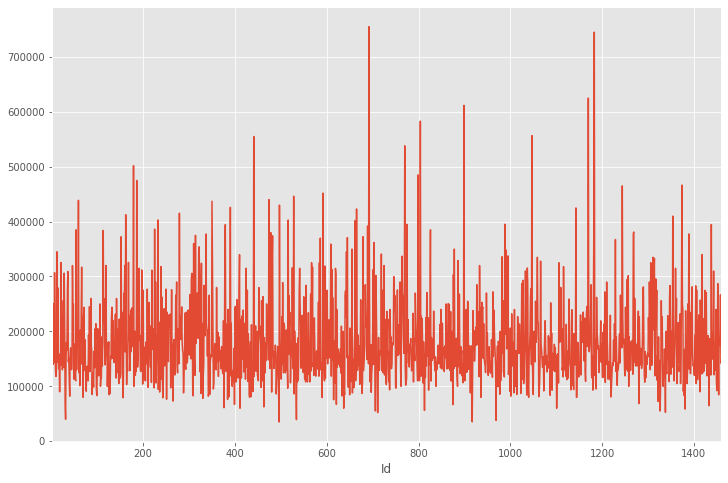

In [382]:
df.SalePrice.plot()

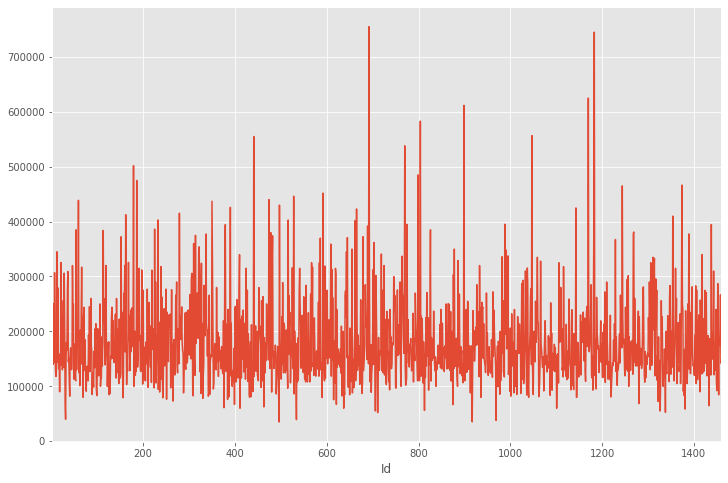

In [383]:
df.SalePrice.plot.line()

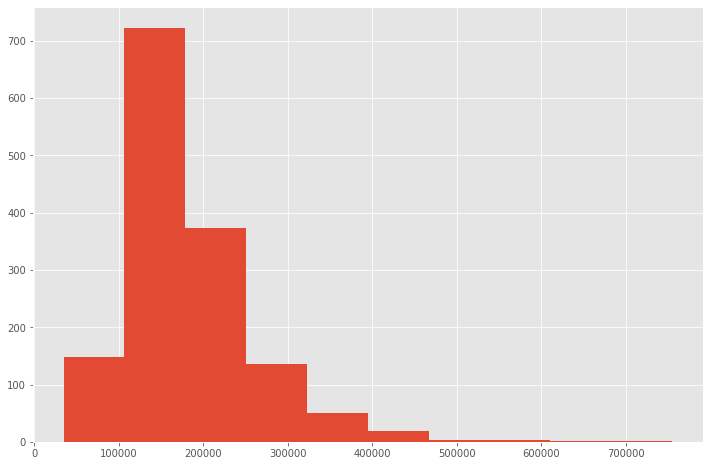

In [390]:
df.SalePrice.hist(bins=10)

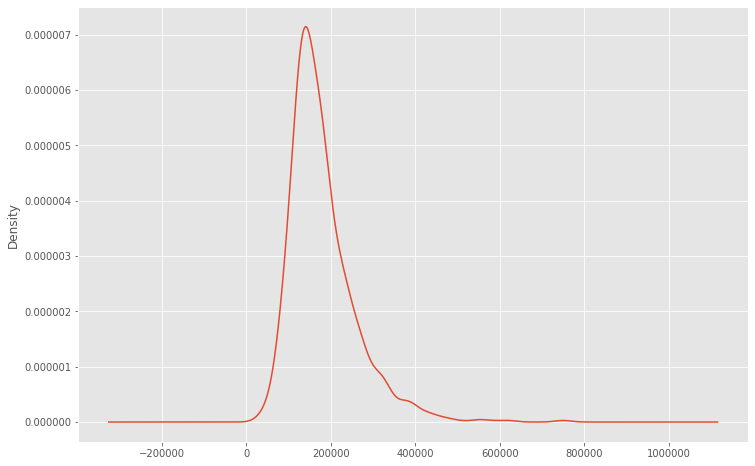

In [385]:
df.SalePrice.plot.density()

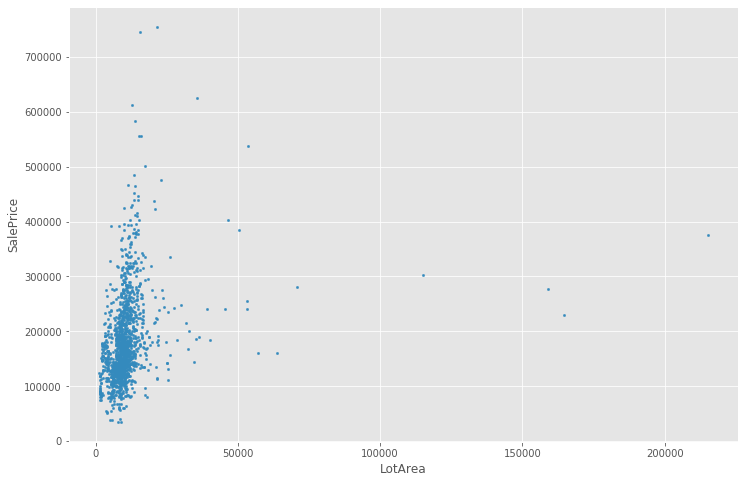

In [388]:
df.plot.scatter('LotArea', 'SalePrice', marker='.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd8ba10>,
      dtype=object)

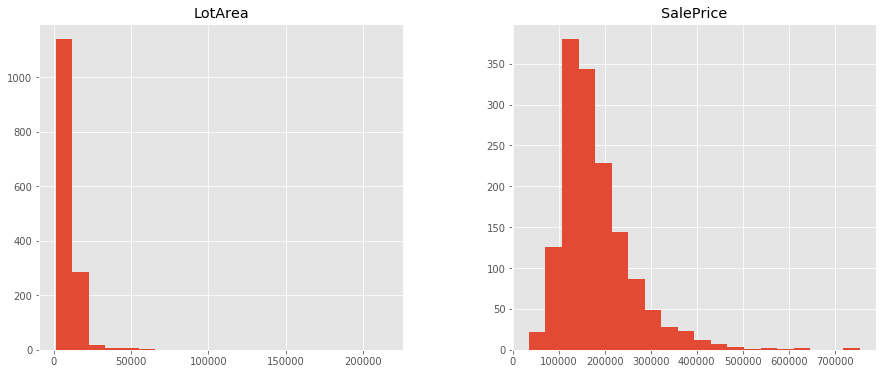

In [183]:
df[['SalePrice', 'LotArea']].hist(bins=20)

In [392]:
%%timeit
sum_price = 0
for row, value in df.iterrows():
    sum_price += value['SalePrice']
print(sum_price)

264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
264144946
126 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [394]:
%%timeit
print(df['SalePrice'].mean())

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589041095
180921.19589

In [395]:
type(df['SalePrice'])

pandas.core.series.Series

In [396]:
type(df.SalePrice)

pandas.core.series.Series

In [399]:
type(df)

pandas.core.frame.DataFrame